# Using requests python module and NASA API

## 1.1 Requests: HTTP for Humans

*"Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor."*

Let's try to get NASA data using web API

In [1]:
import requests

## 1.2 APOD (Astronomy Picture of the Day)
For passing parameters to the API using python dictionary

In [2]:
parameters={'api_key':'ArJFHmBodWJTZpv0mPbCp57AzYapKknp24lownXZ'}
response=requests.get("https://api.nasa.gov/planetary/apod", params=parameters)

In [3]:
print(response.status_code)

200


Codes are available as:

In [4]:
requests.codes.ok

200

In [5]:
# get headers of response object
response.headers

{'Date': 'Mon, 26 Sep 2022 23:53:59 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining', 'Age': '0', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; preload', 'Vary': 'Accept-Encoding', 'Via': 'http/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Cache': 'MISS', 'X-Ratelimit-Limit': '2000', 'X-Ratelimit-Remaining': '1999', 'X-Vcap-Request-Id': '0e090d5f-cc6f-4b3c-5f5b-4796a11ab9d4', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block'}

In [6]:
# get text attribute of response object. this is the payload.
# url for picture is included.
response.text

'{"date":"2022-09-26","explanation":"How much of planet Earth is made of water? Very little, actually. Although oceans of water cover about 70 percent of Earth\'s surface, these oceans are shallow compared to the Earth\'s radius. The featured illustration shows what would happen if all of the water on or near the surface of the Earth were bunched up into a ball. The radius of this ball would be only about 700 kilometers, less than half the radius of the Earth\'s Moon, but slightly larger than Saturn\'s moon Rhea which, like many moons in our outer Solar System, is mostly water ice. The next smallest ball depicts all of Earth\'s liquid fresh water, while the tiniest ball shows the volume of all of Earth\'s fresh-water lakes and rivers. How any of this water came to be on the Earth and whether any significant amount is trapped far beneath Earth\'s surface remain topics of research.","hdurl":"https://apod.nasa.gov/apod/image/2209/WaterlessEarth2_woodshole_2520.jpg","media_type":"image","s

In [7]:
json_data=response.json()
type(json_data)

dict

In [ ]:
# pip install pillow

In [8]:
# can get the image on the fly with the following
from PIL import Image
from io import BytesIO

response=requests.get(json_data['url'])
img=Image.open(BytesIO(response.content))

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

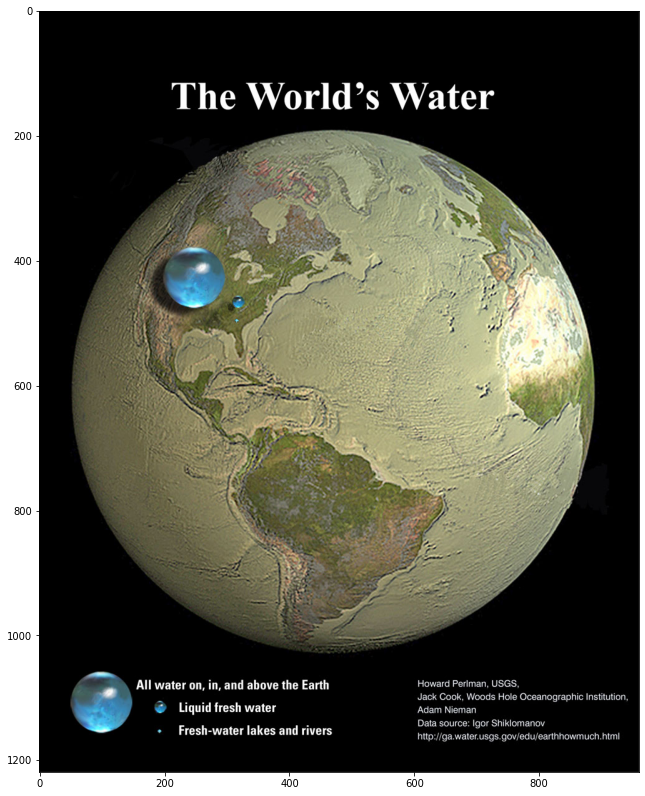

In [10]:
fig, ax=plt.subplots(figsize=(14, 14))
ax.imshow(img)

# 1.3 Mars rovers photo

In [12]:
parameters={'api_key':'ArJFHmBodWJTZpv0mPbCp57AzYapKknp24lownXZ',
           'sol': 1000,
           'camera': 'FHAZ'}
api_end_point='https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'
# look at request and get documentation
response=requests.get(api_end_point, params=parameters)
response.status_code

200

In [14]:
json_data=response.json()
# the data is nothing but a dictionary
json_data

{'photos': [{'id': 102693,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}},
  {'id': 102694,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FRB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active'}}]}

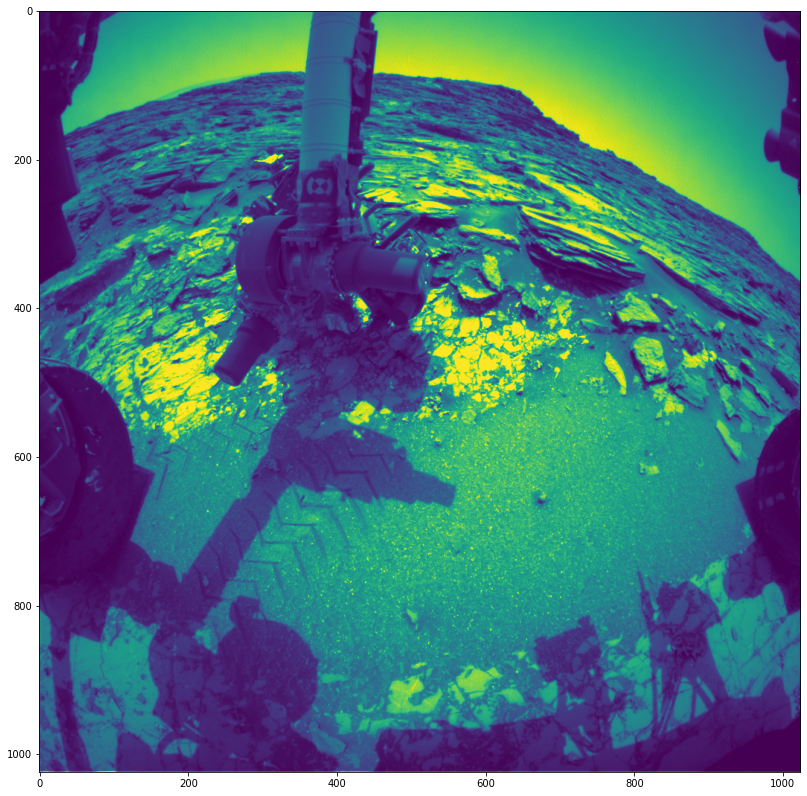

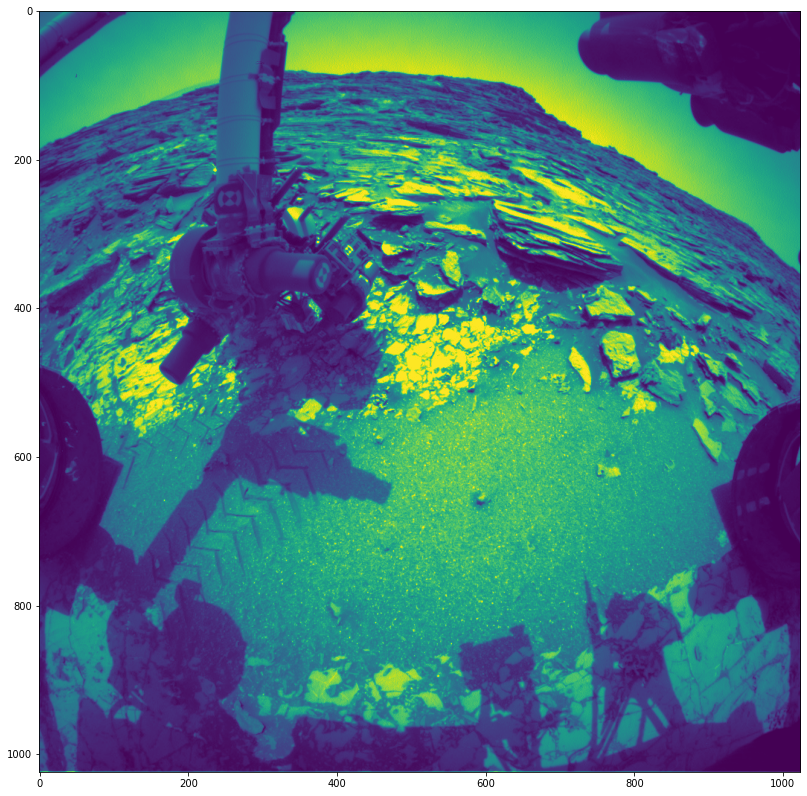

In [15]:
%matplotlib inline
for image_data in json_data['photos']:
    response=requests.get(image_data['img_src'])
    fig, ax=plt.subplots(figsize=(14, 14))
    img=Image.open(BytesIO(response.content))
    ax.imshow(img)

# NASA Techport API

Take a look at the Techport API documentation.

In [17]:
project_id = 93128
api_end_point = f"https://api.nasa.gov/techport/api/projects/{project_id}"
parameters={'api_key':'ArJFHmBodWJTZpv0mPbCp57AzYapKknp24lownXZ'}

response=requests.get(api_end_point, params=parameters)
response.status_code

200

In [18]:
json_data=response.json()
# the data is nothing but a dictionary
json_data['project']['benefits']

'<p>The toilet system has a lower mass and volume than prior systems,\xa0is simpler to use, provides increased crew comfort and performance, and\xa0treats urine so that it can be safety processed by the spacecraft recycling systems. \xa0Future exploration vehicles being developed by NASA will have smaller habitable volumes than the ISS. As habitable volumes decrease, so should toilet hardware\xa0so that crew comfort can be preserved. Having a universal, or standardized toilet design that can be adapted for multiple vehicles reduces overall costs. UWMS consumables and replacement hardware could also be used by multiple vehicles, reducing overall integrated mission logistics complexity. The UWMS effort could eventually lead to development of low mass/volume fecal canisters, increasing packaging and stowage efficiency, which significantly reduces logistics for exploration metabolic waste collection. The fecal canisters could be designed to enable water recovery from feces, which further r

# 2 Using REST API for Collecting Tweets with POST and GET
## Note that Twitter has upgraded the API to v2.  

1. Sign up for an account (access level Essential)
2. Creat a new app (this will generate a client key, secret key and bearer token)
3. Review the API documentation

See [here](https://developer.twitter.com/en/docs/api-reference-index) for a complete list of endpoints.  It's a good idea to stick to the Search Tweets endpoints (recent and full-archive) to start.

# 3 POST OAuth2.0/token (for application only authentication)

In [20]:
!ls

prod_data.csv  requests_demo.ipynb  scraping_demo.ipynb


In [21]:
# reading the api key and api key secret from a local file
import requests
import json
import base64

#with open('twitter_keys.txt') as f:
#    lines = f.readlines()
client_key='gktTexWbbaMGUFs9bvbSvyZRb'
client_secret='UjEvqXcReCQKdn33oOqZu7lsXOtMoHBtQjlWWaFZP3ev1jI9tu'
# bearer token
bearer_token='AAAAAAAAAAAAAAAAAAAAAO8ZhgEAAAAA6C%2BjlPmqoEYZIh3D7UPNpUWUN4k%3DS6PtQPDHwVKzHyemkqxK1FQRgSKo7Ewk6BoxOVnKiaeMtbMQ34'

In [22]:
# Note that we'll be making App only requests which only require the bearer token.
# generating bearer_token...note that we can just get the bearer token from the web interface as well.

# first convert the str to a bytes-like object
key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
# encode with base64
b64_encoded_key = base64.b64encode(key_secret)
# get string representation of the base64 encoding.
b64_encoded_key = b64_encoded_key.decode('ascii')

auth_endpoint='https://api.twitter.com/oauth2/token'

auth_headers = {'Authorization': 'Basic {}'.format(b64_encoded_key),
               'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'}
auth_data = {'grant_type': 'client_credentials'}

response = requests.post(auth_endpoint, headers=auth_headers, data=auth_data)

#print(response.status_code)
#print(response.text)

json_data = response.json()
bearer_token = json_data['access_token']

# Asynch Ex: Let's Run Some Queries Against the Twitter API

#### We need to build our query
[See here](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query) for information on building queries to search Tweets.

The documentation on [building high-level queries](https://developer.twitter.com/en/docs/tutorials/building-high-quality-filters) is also helpful.

The search endpoints accept a single query with a GET request and return a set of historical Tweets that match the query.  Queries are made up of operators that are used to match on a variety of Tweet attributes. 

__Operators__ are used to match tweets.  You can find a table of operators [here](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query#list).

There are two types of operators. Standalone and conjunction-required.

__Standalone__ can be used alone or with any other operators.  For example, the #hashtag operator is standalone, so this is a valid query: #bananastand

__Conjunction-required operators__ cannont be used alone in a query.  They can be used when at least one standalone operator is included in the query....using conjunction-required alone would be too general.

The response fields for recent Tweet search can be found [here](https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-recent)

We can also use boolean operators and grouping to string together multiple operators in a single query. We have access to AND, OR, NOT.  Prepend a dash (-) to a keyword or operator to negate it. For example -hotdog or -is:retweet. 

We can group with parentheses. For example, (hot dog) OR (#hotdog has:images) will return either Tweets containing the words hot and dog or Tweets with images that have the hashtag #hotdog.  This is not an XOR.

Feel free to use the Twitter [query builder](https://developer.twitter.com/apitools/query?query=) when crafting your queries.  Actually...definitely use it.  This tool will help you get comfortable with the query syntax and will validate queries for you.

## Let's run a very simple query

In [23]:
from pprint import pprint

In [24]:
# Example 1

# specify the endpoint
endpoint = "https://api.twitter.com/2/tweets/search/recent"

# create header object with bearer_token
headers = {'Authorization': 'Bearer {}'.format(bearer_token)}

# specify query 
query = "John Cheever"

# specify tweet_fields
tweet_fields = 'tweet.fields=text'

# specify max results (optional)
max_results = 'max_results=10'

# create the url for request
url = endpoint + "?query=" + query + "&" + tweet_fields + "&" + max_results

print(url)
# make the request ( same as request.get)
response = requests.request("GET", url, headers=headers)

print(response.status_code)

#data = response.json()
#pprint.pprint(data)

# Can also use: https://pypi.org/project/twitter/

https://api.twitter.com/2/tweets/search/recent?query=John Cheever&tweet.fields=text&max_results=10
200


In [25]:
data = response.json()
pprint(data)

{'data': [{'id': '1574483346029264902',
           'text': '@MathersOzan @BeratStuff "Sanatın ortaya çıktığı her yerde '
                   'yaşam kaybolur." - John Cheever\n'
                   ' \n'
                   ' https://t.co/pNOHhBFN5x'},
          {'id': '1574459866206306305',
           'text': '@goodreads Lucky Jim and anything by Fred Exley or John '
                   'Cheever!'},
          {'id': '1574448108607766533',
           'text': '@jrb_young It’s not quite the same as it used to be in the '
                   'days of like John Cheever and those kind of writers, but '
                   'it would still be an amazing publication.'},
          {'id': '1574443430658379778',
           'text': '“Fiction is art and art is the triumph over chaos… to '
                   'celebrate a world that lies spread out around us like a '
                   'bewildering and stupendous dream.”\n'
                   '--John Cheever'},
          {'id': '1574339572733018120',
      

#### And now a slightly more complex query....

In [26]:
# specify query
# Api will give you query VV text
query = '"climate change" is:verified -is:retweet lang:en'

# specify field for payload
tweet_fields = "tweet.fields=text,id,author_id,created_at"

# specify max results (optional)
max_results = 'max_results=10'

# get expanded author_id object
#expansions = "expansions=author_id"

# create the url for request
url = endpoint + "?query=" + query + "&" + tweet_fields + "&" + max_results

# make the request
response = requests.request("GET", url, headers=headers)

print(response.status_code)

cc_data = response.json()
pprint(cc_data)

200
{'data': [{'author_id': '2914657442',
           'created_at': '2022-09-27T00:24:06.000Z',
           'id': '1574555446588817408',
           'text': 'Concerning finding in this new @ASPI_org report- little '
                   'attention has been paid to understanding the impacts of '
                   "climate change in 🇨🇳 despite the country's key role in "
                   'global climate change debates, immense economic importance '
                   '&amp; major geostrategic relevance '
                   'https://t.co/u1GD4xzDTF'},
          {'author_id': '112280016',
           'created_at': '2022-09-27T00:21:59.000Z',
           'id': '1574554910934241280',
           'text': 'Every single Democrat in America voted to destroy the '
                   'economy over some stupid climate change nonsense. '
                   'https://t.co/Z2ay7rVeXr'},
          {'author_id': '178978113',
           'created_at': '2022-09-27T00:20:11.000Z',
           'id': '15745544582514

# EX 1: Modularizing our Approach
Now we'll modularize our code a bit by building a function to execute our request.

In [27]:
def search_twitter(query, tweet_fields, max_results=10, bearer_token=bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&max_results={}".format(
        query, tweet_fields, max_results
    )
    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

#### Let's look for a single term.  Note the quoting.  I want to find instances of "pickle ball" not instances of "pickle" and "ball".

In [28]:
query = '"pickle ball"'
tweet_fields = 'tweet.fields=text,author_id,created_at'
max_results = 10

json_response=search_twitter(query=query,
                             tweet_fields=tweet_fields,
                             max_results=max_results,
                             bearer_token=bearer_token)

pprint(json_response)

200
{'data': [{'author_id': '1043552431',
           'created_at': '2022-09-27T00:23:41.000Z',
           'id': '1574555339411935232',
           'text': 'Pickle Ball 🎾 tonight with @HanniganSC11 I went 5-1 only '
                   'lose was with SHAYNE! as my partner. 🤦🏽😝 @USAPickleball '
                   '@DinkPickleball @TheKitchenPB https://t.co/56k0pJOpaQ'},
          {'author_id': '2456687743',
           'created_at': '2022-09-26T23:49:11.000Z',
           'id': '1574546658171375616',
           'text': '@TheKitchenPB @RobGronkowski @Chrisgronkowski '
                   '@iceshakerbottle @RobGronkowski leave the pickle ball '
                   'where it belongs with the elderly...😉 Tom need you.'},
          {'author_id': '1093934579226955776',
           'created_at': '2022-09-26T23:34:31.000Z',
           'id': '1574542964982009865',
           'text': 'Sophisticated Two Story 🏠\n'
                   'Poised on the most desirable block in the neighborhood, '
              

#### Now a more complex query...

In [29]:
# Example 2
query = '"stranger things" has:mentions -is:retweet (has:media OR has:links)'
tweet_fields = 'tweet.fields=text,author_id,created_at'

json_response=search_twitter(query=query,tweet_fields=tweet_fields,bearer_token=bearer_token)
pprint(json_response)

200
{'data': [{'author_id': '112764063',
           'created_at': '2022-09-27T00:30:00.000Z',
           'id': '1574556928604184576',
           'text': '#StrangerThings #Trivia @BlackBearBar this Wednesday, '
                   'September 28 at 8pm. RSVP at; https://t.co/KMV3Jykj0i '
                   '#Hoboken #JerseyCity #WinonaRyder #MillieBobbyBrown '
                   '#DavidHarbour'},
          {'author_id': '1354932220859985923',
           'created_at': '2022-09-27T00:28:15.000Z',
           'id': '1574556490723168258',
           'text': 'Food: Pizza\n'
                   'Drink: Coffee (black)\n'
                   'Color: Red/Black/Purple\n'
                   'Season: Fall in the Midwest\n'
                   'Show: Stranger Things\n'
                   '\n'
                   'Tagging: @NanashiNightVT @LadyAlipsos @DeneriusDenn '
                   '@Vivi_the_Dragon https://t.co/5yt5qftLhe'},
          {'author_id': '1041967194912030721',
           'created_at': '2022-

# Ex2 More Sophisticated Query

We've mostly focused on the query, but the request we submit has other paramters that can be specified as well.  We've already used some of them (max_results, tweet_fields).  Each endpoint will detail the parameters we can specify.  For recent tweet search only the query is a required parameter.

In [30]:
def connect_to_endpoint(url, headers, params):
    
    response = requests.get(url, headers=headers, params=params)
    
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [34]:
url = "https://api.twitter.com/2/tweets/search/recent"

headers = {"Authorization": "Bearer {}".format(bearer_token)} 

query_params = {'query': '"Russell Wilson" "Hackett" has:mentions -is:retweet has:media is:verified has:images',
                'max_results': 10,
                'tweet.fields': 'id,author_id,text,geo,conversation_id',
                'expansions': 'author_id,geo.place_id',
                'user.fields': 'name,username,verified,location',
                'place.fields': 'country_code,geo,name,place_type'}

In [35]:
data = connect_to_endpoint(url, headers, query_params)

200


In [36]:
pprint(data)

{'data': [{'author_id': '581971753',
           'conversation_id': '1573447116990488576',
           'id': '1573447116990488576',
           'text': 'Why are the Russell Wilson/Nathaniel Hackett Broncos '
                   "struggling? What's the driving force behind the Giants' "
                   'surprising 2-0 start? Is Matt Ryan cooked in Indianapolis? '
                   '@BuckyBrooks answers those questions in this edition of '
                   "the Scout's Notebook\n"
                   '\n'
                   'https://t.co/0CFpcjxQb2 https://t.co/luGAstCl0X'},
          {'author_id': '247338532',
           'conversation_id': '1572318428521635840',
           'id': '1572318428521635840',
           'text': 'Right now! @KelbermanNFL and I are live on MHSR | 98.1 FM '
                   'for the @MileHighHuddle Show, breaking down how Coach '
                   'Hackett, Russell Wilson, and co are perhaps paying for the '
                   "#Broncos' sins of the past... \n